In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
file_path = 'FD_SALAAN_2021_csv/FD_SALAAN_2021.csv'

# Create the DataFrame
df = pd.read_csv(file_path, sep=';', low_memory=False)

print(f"Dataset loaded with {df.shape[0]} observations.")

Dataset loaded with 2403775 observations.


In [6]:
# Check dimensions (Rows, Columns)
print(f"Shape: {df.shape}")

# List all column names to see the 'PCS', 'NAF', and 'SEXE' headers
print(f"Columns: {df.columns.values}")

# Summary of data types and non-null counts
# This is critical for seeing if 'S_NET_EUR' (Salary) is a float or an object
df.info()

Shape: (2403775, 31)
Columns: ['A6' 'A17' 'A38' 'CPFD' 'DATDEB' 'DATFIN' 'DEPR' 'DEPT' 'DOMEMPL'
 'DOMEMPL_EM' 'DUREE' 'FILT' 'REGR' 'REGT' 'SEXE' 'PCS' 'TYP_EMPLOI'
 'CONV_COLL' 'NBHEUR' 'NBHEUR_TOT' 'AGE' 'TRNNETO' 'TRALCHT' 'TREFF'
 'CONT_TRAV' 'CS' 'AGE_TR' 'DATDEB_TR' 'DATFIN_TR' 'DUREE_TR' 'POND']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403775 entries, 0 to 2403774
Data columns (total 31 columns):
 #   Column      Dtype  
---  ------      -----  
 0   A6          object 
 1   A17         object 
 2   A38         object 
 3   CPFD        object 
 4   DATDEB      float64
 5   DATFIN      float64
 6   DEPR        object 
 7   DEPT        object 
 8   DOMEMPL     float64
 9   DOMEMPL_EM  float64
 10  DUREE       float64
 11  FILT        int64  
 12  REGR        float64
 13  REGT        float64
 14  SEXE        int64  
 15  PCS         object 
 16  TYP_EMPLOI  object 
 17  CONV_COLL   float64
 18  NBHEUR      float64
 19  NBHEUR_TOT  int64  
 20  AGE         float64
 21  TR

In [7]:
# Check for standard NaN/null values first
null_counts = df.isnull().sum()
print("Standard null values per column:")
print(null_counts[null_counts > 0])

# Administrative check: Find columns with empty strings or whitespace
for col in df.select_dtypes(include=['object']).columns:
    empty_count = (df[col].astype(str).str.strip() == '').sum()
    if empty_count > 0:
        print(f"Column {col} has {empty_count} empty string entries.")

Standard null values per column:
A6             96234
A17            96234
A38             8377
CPFD           87887
DATDEB         87891
DATFIN         87887
DEPR             690
DEPT             223
DOMEMPL        87893
DOMEMPL_EM     87895
DUREE          87887
REGR             690
REGT             223
PCS                5
CONV_COLL     580663
NBHEUR         87887
AGE                2
TREFF          87887
CONT_TRAV      89182
CS                 5
AGE_TR             2
DATDEB_TR      87891
DATFIN_TR      87890
DUREE_TR       87887
dtype: int64


In [10]:
# See the first 10 rows to see the raw format
print("Raw TRNNETO values (first 10 rows):")
print(df['TRNNETO'].head(10))

# See all unique 'tranche' codes and how many people are in each
print("\nFrequency of each Salary Tranche:")
print(df['TRNNETO'].value_counts().sort_index())

Raw TRNNETO values (first 10 rows):
0    15
1    12
2    20
3     6
4    15
5    15
6    23
7    17
8    15
9    22
Name: TRNNETO, dtype: int64

Frequency of each Salary Tranche:
TRNNETO
0        240
1        592
2       4794
3      30022
4      39083
5      73460
6      67358
7     120161
8     111967
9     118031
10    111997
11    109501
12    125933
13    144555
14    163694
15    162269
16    149751
17    132108
18    113143
19     95396
20    172700
21    108381
22    114143
23    134496
Name: count, dtype: int64



Statistical Summary:


,TRNNETO
count,2.403775e+06
mean,1.418324e+01
std,5.424315e+00
min,0.000000e+00
25%,1.000000e+01
50%,1.400000e+01
75%,1.900000e+01
max,2.300000e+01


/var/folders/5q/fx2dxhl52b3c_xdmrzcdb99m0000gn/T/ipykernel_3618/3026911618.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TRNNETO', palette='viridis')


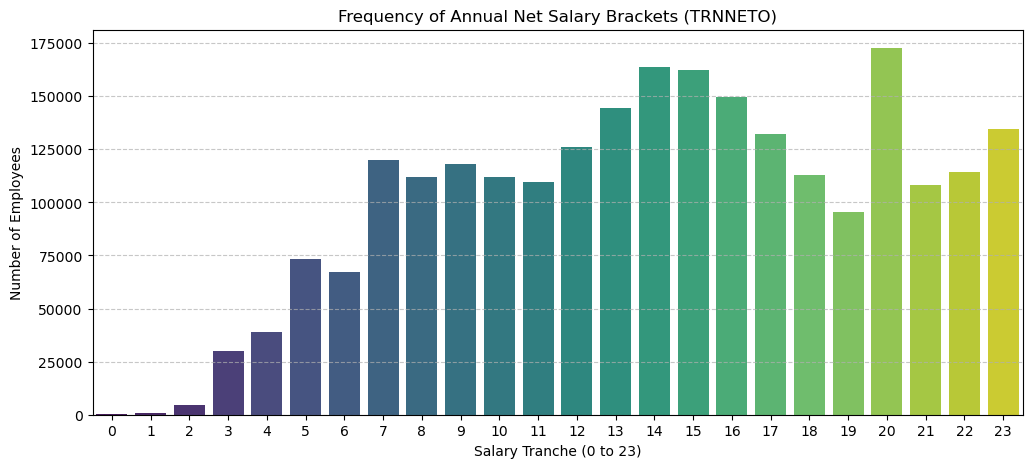

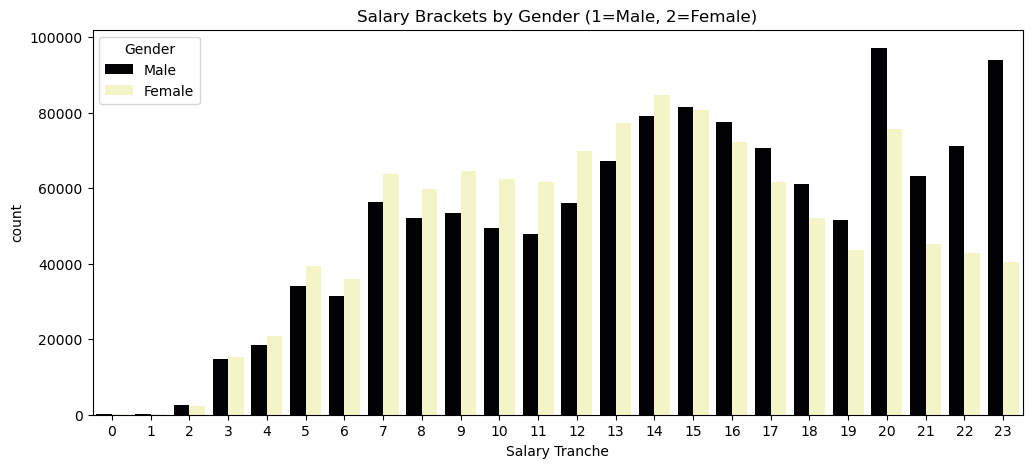

In [14]:
# Descriptive statistics for numerical variables
# Look closely at the min/max for TRNNETO (Salary) 
print("\nStatistical Summary:")
display(df[['TRNNETO']].describe())


# Discrete Distribution (Count Plot)
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='TRNNETO', palette='viridis')

plt.title('Frequency of Annual Net Salary Brackets (TRNNETO)')
plt.xlabel('Salary Tranche (0 to 23)')
plt.ylabel('Number of Employees')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gender-Specific Distribution
# Seeing if men/women cluster in different tranches
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='TRNNETO', hue='SEXE', palette='magma')

plt.title('Salary Brackets by Gender (1=Male, 2=Female)')
plt.xlabel('Salary Tranche')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

In [15]:
# See the breakdown of Gender (SEXE)
# 1 = Male, 2 = Female according to INSEE 
print("\nGender Breakdown:")
print(df['SEXE'].value_counts(normalize=True))


Gender Breakdown:
SEXE
1    0.512067
2    0.487933
Name: proportion, dtype: float64


In [16]:
# See the breakdown of by contract type (CONT_TRAV)
print("Actual values in CONT_TRAV:")
print(df['CONT_TRAV'].value_counts())

print("\nActual values in SEXE:")
print(df['SEXE'].value_counts())

Actual values in CONT_TRAV:
CONT_TRAV
CDI    1399348
AUT     450321
CDD     240886
TTP     101608
APP      78242
TOA      44188
Name: count, dtype: int64

Actual values in SEXE:
SEXE
1    1230895
2    1172880
Name: count, dtype: int64


In [ ]:
import numpy as np

# 1. Define the Midpoint Mapping (Euro values)
# Based on your INSEE dictionary screenshot, we map category index to euro midpoints.
# This ensures a linear relationship between income levels.
tranche_to_euro = {
    0: 100, 1: 350, 2: 750, 3: 1250, 4: 1750, 5: 2500, 
    6: 3500, 7: 5000, 8: 7000, 9: 9000, 10: 11000, 
    11: 13000, 12: 15000, 13: 17000, 14: 19000, 15: 21000,
    16: 23000, 17: 25000, 18: 27000, 19: 29000, 20: 32500,
    21: 37500, 22: 45000, 23: 55000 # Using 55k as a proxy for the 50k+ tranche
}

# 2. Robust cleaning of Categorical strings
df['CONT_TRAV'] = df['CONT_TRAV'].astype(str).str.strip().str.upper()

# 3. Apply Filtering 
# Age 25-65 and 1607h hours follow the paper's 'strong attachment' logic[cite: 31, 226, 228].
# We use tranche 12 (approx. 15,000€) as the minimum wage cutoff[cite: 228].
df_model = df[
    (df['NBHEUR'].fillna(0) >= 1607) & 
    (df['AGE'].fillna(0) >= 25) & 
    (df['AGE'].fillna(0) <= 65) &
    (df['TRNNETO'].fillna(0) >= 12) & 
    (df['CONT_TRAV'] == "CDI")
].copy()

# 4. Feature Engineering: Continuous Wage and Log Wage
# Map tranches to midpoints to create a continuous proxy for salary
df_model['annual_wage_euro'] = df_model['TRNNETO'].map(tranche_to_euro)

# Create the Dependent Variable (y) in Log Scale [cite: 240, 353]
df_model['y'] = np.log(df_model['annual_wage_euro'])

# 5. Treatment Variable: Female = 1, Male = 0 [cite: 347]
df_model['female'] = (df_model['SEXE'] == 2).astype(int)

print(f"Final sample size for DoubleML: {len(df_model)}")
print(f"Example Log Wage (y): {df_model['y'].iloc[0]:.4f}")

Final sample size for DoubleML: 773603
Example Log Wage (y): 9.9523


In [5]:

print(f"Number of women in sample: {df_model['female'].sum()}")

NameError: name 'df_model' is not defined